# The World's Billionaires From 1987 to 2022

This dataset provides information on the top 10 billionaires of each year from 1987 to 2022. The dataset includes the names of the billionaires, their age, nationality, net worth, and source of wealth.

The goal of this project is to explore and analyze the data, and come up with some valuable insights from it. I also would like to mention that the motivation for this project comes from the course [Data Analysis with Python: Zero to Pandas](https://jovian.com/learn/data-analysis-with-python-zero-to-pandas) where I learned the essentials for data analysis and manipulation. 

Now it is time to put that knowledge into practice!

## Importing necessary libraries and loading the data

Here we import the pandas and numpy libraries for data manipulation.

In [16]:
import pandas as pd
import numpy as np
import opendatasets as od

In [17]:
url = 'https://www.kaggle.com/datasets/belayethossainds/the-worlds-billionaires-dataset-19872022'
od.download(url)

Skipping, found downloaded files in ".\the-worlds-billionaires-dataset-19872022" (use force=True to force download)


In [18]:
path = './the-worlds-billionaires-dataset-19872022/The Worlds Billionaires Dataset 1987-2022.csv'
billion = pd.read_csv(path, encoding='unicode_escape')
billion.head()

,Year,Yearly ranking,Name,Net worth (USD)\n(billion),Age,Nationality,Source(s) of wealth
0,2022,1,Elon Musk,$219 billion,50,United States,"Tesla, SpaceX"
1,2022,2,Jeff Bezos,$177 billion,58,United States,Amazon
2,2022,3,Bernard Arnault & family,$158 billion,73,France,LVMH
3,2022,4,Bill Gates,$129 billion,66,United States,Microsoft
4,2022,5,Warren Buffett,$118 billion,91,United States,Berkshire Hathaway


## Data Preparation and Cleaning

In this part we will prepare the data for analysis.



In [19]:
billion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Year                       362 non-null    int64 
 1   Yearly ranking             362 non-null    object
 2   Name                       362 non-null    object
 3   Net worth (USD)
(billion)  362 non-null    object
 4   Age                        362 non-null    object
 5   Nationality                362 non-null    object
 6   Source(s) of wealth        362 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.9+ KB


Firstly I will rename the columns such that it is easier to manipulate the data further ahead.

In [20]:
billion.columns = ['year', 'ranking', 'name', 'net_worth', 'age', 'nationality', 'source']

The next step is to adjust the data type for each column in a convenient way (e.g. transform numeric data into int or float, dates to datetime format, etc.).

> *Note that in this case the year column can stay as an integer, because it is just the year anyway.*

First I remove any white spaces in the strings and next I transform the numeric data to appropriate data types. 

The pandas.to_numeric() function is a convenient alternative to change dtypes of series. Besides of that, it has a nice argument (errors) that can handle situations where it is not possible to parse the element to numeric, replacing it with NaN.

In [21]:
billion.age = billion.age.str.strip()
billion.age = pd.to_numeric(billion.age, errors='coerce')

In [22]:
billion.ranking = billion.ranking.str.strip()
billion.ranking = pd.to_numeric(billion.ranking, errors='coerce')

For the net_worth column I had to first remove the '$' and 'billion' strings

In [23]:
billion.net_worth.head()

0    $219 billion 
1    $177 billion 
2    $158 billion 
3    $129 billion 
4    $118 billion 
Name: net_worth, dtype: object

In [24]:
billion.net_worth = billion.net_worth.str.replace(r'^\D+', '', regex=True)
billion.net_worth = billion.net_worth.str.replace(r'\D+$', '', regex=True)

And then apply the same procedure to convert it to numeric.

In [25]:
billion.net_worth = billion.net_worth.str.strip()
billion.net_worth = pd.to_numeric(billion.net_worth, errors='coerce')

Now the data is more well suited for analysis.

In [26]:
billion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         362 non-null    int64  
 1   ranking      362 non-null    int64  
 2   name         362 non-null    object 
 3   net_worth    362 non-null    float64
 4   age          265 non-null    float64
 5   nationality  362 non-null    object 
 6   source       362 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 19.9+ KB


Finally I just had to convert the net_worth values to billion

In [27]:
billion.net_worth.head()

0    219.0
1    177.0
2    158.0
3    129.0
4    118.0
Name: net_worth, dtype: float64

In [28]:
billion.net_worth = billion.net_worth * 1e9

One thing I noticed is that the unavailable information in the source column is represented by '/', so I replaced it with NaN to make it compatible to the other columns.

In [29]:
billion.source = billion.source.replace('/', np.nan)

Let us see the distribution of unavailable data:

In [30]:
billion.isna().sum()

year            0
ranking         0
name            0
net_worth       0
age            97
nationality     0
source         90
dtype: int64

## Exploratory Analysis and Visualization

In this part I will explore the data through statistics information, distribution of numeric columns, relationship between columns, etc.

Let's begin by importing`matplotlib.pyplot` and `seaborn` to generate visualizations of the data.

In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

First let us look at the statistics

In [32]:
billion.describe(include='all')

,year,ranking,name,net_worth,age,nationality,source
count,362.000000,362.000000,362,3.620000e+02,265.000000,362,272
unique,NaN,NaN,88,NaN,NaN,17,53
top,NaN,NaN,Bill Gates,NaN,NaN,United States,Microsoft
freq,NaN,NaN,31,NaN,NaN,185,39
mean,2004.486188,5.439227,NaN,3.576409e+10,65.128302,NaN,NaN
std,10.375823,2.820170,NaN,3.186351e+10,14.248822,NaN,NaN
min,1987.000000,1.000000,NaN,4.000000e+09,31.000000,NaN,NaN
25%,1996.000000,3.000000,NaN,1.350000e+10,54.000000,NaN,NaN
50%,2004.000000,6.000000,NaN,2.500000e+10,66.000000,NaN,NaN
75%,2013.000000,8.000000,NaN,5.000000e+10,77.000000,NaN,NaN


Here we can see the power of the describe function. With very few code we can extract a lot of valuable information from the data such as:

* Bill gates is the one who appeared most frequently in the 1st position;
* The mean net worth of the 10 richest people on earth from 1987 to 2022 was around 35.76 billion dollars;
* The largest net worth reached in this time period was 219 billion dollars;
* The mean age of the top 10 richest people on earth from 1987 to 2022 was around 65 years;
* The oldest billionaire in the list was 94 years old, while the youngest was 31 years old;
* There were 17 different nationalities in the list in this time period;
* The majority of billionaires were from United States;
* There were 53 sources of wealth registered in this time period, with 88 different people. At first this suggests that there were peolple in the list with the same source of wealth, but we have to consider that there are 90 NaN values for this column, so this information might not be accurate.


Let us take a look at the mean net worth over the years

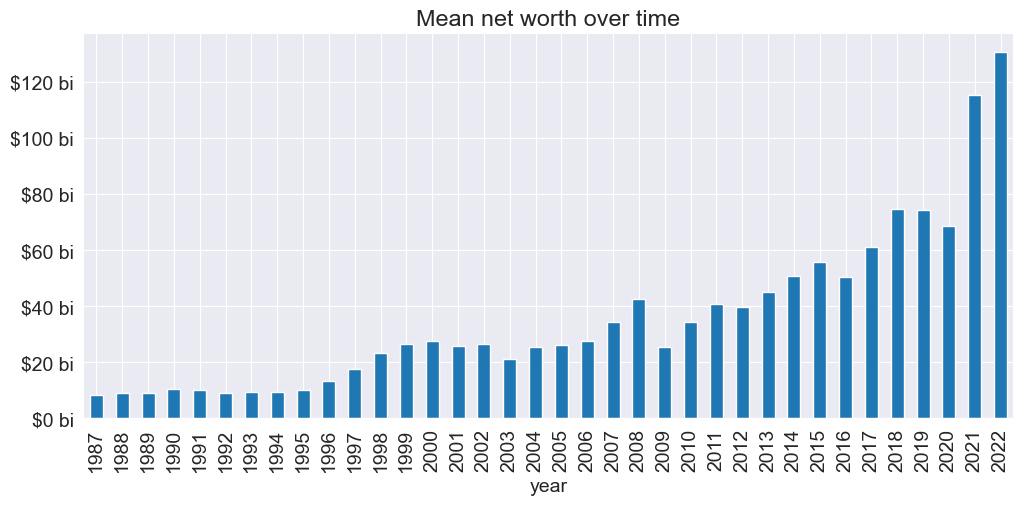

In [33]:
# Ploting directly through pandas and assigning it to an axis variable for further customization
ax = billion.groupby('year')['net_worth'].mean().plot(kind='bar', title='Mean net worth over time', figsize=(12,5))

# Function for formating the y label of the plot to make it more readable
billions = lambda x, pos: '${:.0f} bi'.format(x*1e-9)

# Instantiate it as a FuncFormatter to use it in the set_major_formatter method
formatter = plt.FuncFormatter(billions)  
ax.yaxis.set_major_formatter(formatter)

Highlights from the above plot:

* Up until 1995 the mean net worth stayed relatively constant;
* In the late 90's with the .com buble there was a significant increase in the mean net worth, followed by a decrease later in 2003;
* In 2008 it reachead a peak and then decreased to almost half in just one year due to the subprime crisis;
* There was a decrease in 2020 due to COVID pandemic;
* It is impressive how the mean net worth increased substantially in 2021 and 2022, doubling in just 2 years.

Looking back at the statistics I was just curious to see some of these informations:

* The record for the largest net worth

In [34]:
billion.query("net_worth == net_worth.max()")

,year,ranking,name,net_worth,age,nationality,source
0,2022,1,Elon Musk,2.190000e+11,50.0,United States,"Tesla, SpaceX"


* The record for the smallest net worth

In [35]:
billion.query("net_worth == net_worth.min()")

,year,ranking,name,net_worth,age,nationality,source
361,1987,10,Keizo Saji,4.000000e+09,NaN,Japan,NaN


* The record for the oldest billionaire

In [36]:
billion.query("age == age.max()")

,year,ranking,name,net_worth,age,nationality,source
248,1998,7,Forrest Mars Sr. & family,1.350000e+10,94.0,United States,"Mars, Inc.[49]"


* The record for the youngest billionaire

In [37]:
billion.query("age == age.min()")

,year,ranking,name,net_worth,age,nationality,source
65,2016,6,Mark Zuckerberg,4.460000e+10,31.0,United States,"Facebook, Inc."


For the sake of completeness let us also take a look at the most recent top 10:

In [38]:
billion.query("year == 2022")

,year,ranking,name,net_worth,age,nationality,source
0,2022,1,Elon Musk,2.190000e+11,50.0,United States,"Tesla, SpaceX"
1,2022,2,Jeff Bezos,1.770000e+11,58.0,United States,Amazon
2,2022,3,Bernard Arnault & family,1.580000e+11,73.0,France,LVMH
3,2022,4,Bill Gates,1.290000e+11,66.0,United States,Microsoft
4,2022,5,Warren Buffett,1.180000e+11,91.0,United States,Berkshire Hathaway
5,2022,6,Larry Page,1.110000e+11,49.0,United States,Alphabet Inc.
6,2022,7,Sergey Brin,1.070000e+11,48.0,United States,Alphabet Inc.
7,2022,8,Larry Ellison,1.060000e+11,77.0,United States,Oracle Corporation
8,2022,9,Steve Ballmer,9.140000e+10,66.0,United States,Microsoft
9,2022,10,Mukesh Ambani,9.070000e+10,64.0,India,Reliance Industries


Next let us see the age distribution in the dataset

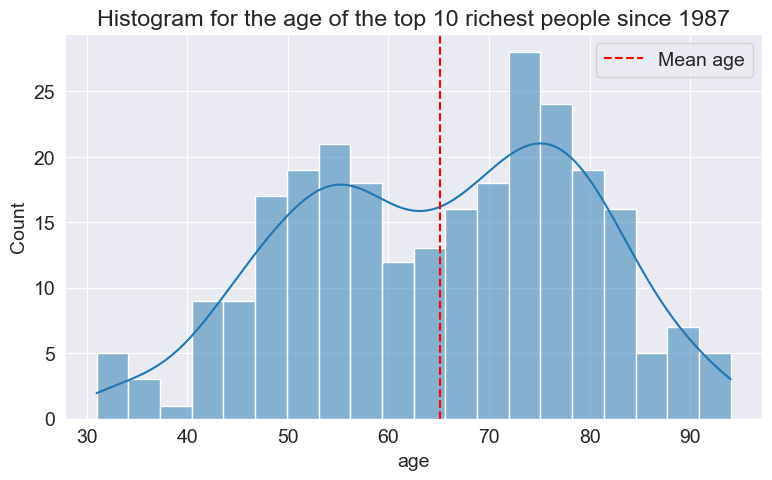

In [39]:
ax = sns.histplot(data=billion, x='age', bins=20, kde=True)
ax.set_title('Histogram for the age of the top 10 richest people since 1987')
ax.axvline(x=billion.age.mean(), color='r', linestyle='--', label='Mean age')
ax.legend();

Let us also investigate if there is some meaningful relationship between the variables

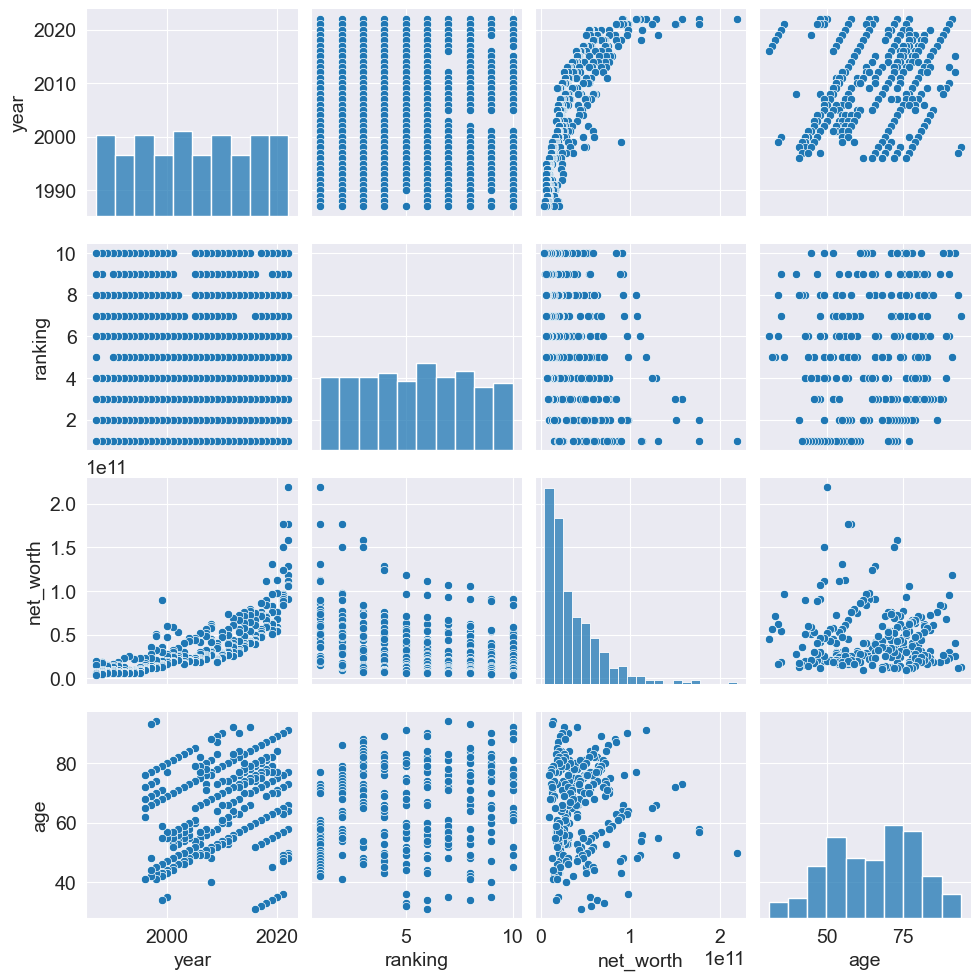

In [40]:
sns.pairplot(data=billion);

## Asking and Answering Questions

In this section I came up with some interesting questions about the data. Next I investigated and developed some visualizations to answer those questions in an insightful way.



#### Q1: What country had more billionaires (in the top 10) throughout the years?

First we have to group all the nationalities for each year and count how many times each one appears.

In [41]:
n = billion.groupby('year')['nationality'].value_counts()\
                                          .rename('n_count')\
                                          .reset_index()

Next I dropped the nationalities that appeared just once in the year in order to make the plot more clean, without loosing too much information.

In [42]:
n = n.drop(index=n.query("n_count == 1").index)

Then I chose to make a point plot to demonstrate the evolution of each nationality count throughout the years.

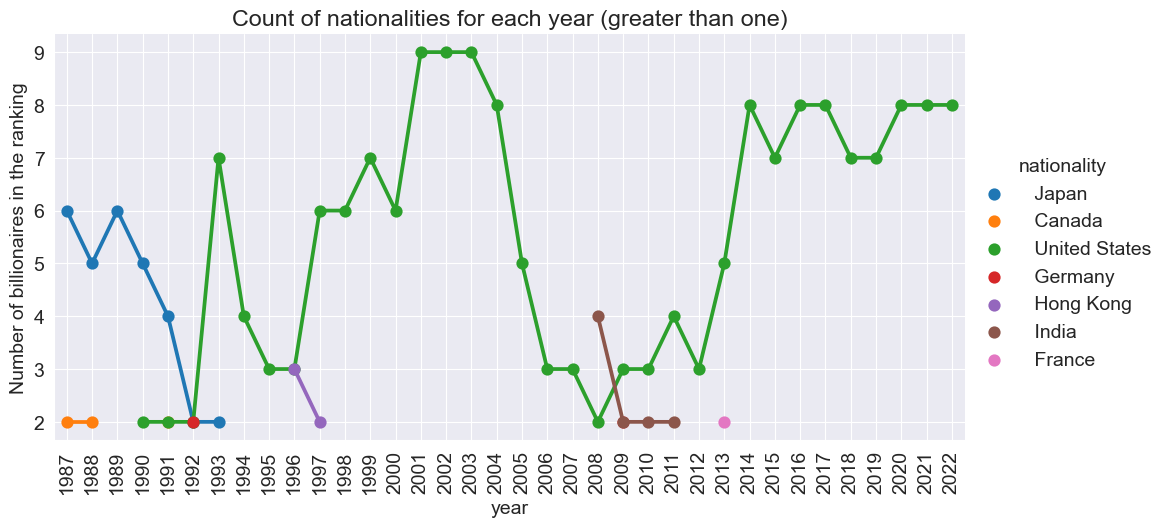

In [43]:
sns.catplot(data=n, x='year', y='n_count', hue='nationality', kind='point', aspect=2)
plt.xticks(rotation=90)
plt.grid(visible=True)
plt.title("Count of nationalities for each year (greater than one)")
plt.ylabel('Number of billionaires in the ranking');

Highlights from the above plot:

* Up until the early 90's Japan had most of the top richest people on earth;
>That is probably due to the so called "asset price bubble" that took from 1986 to 1991. For more info [click here](https://en.wikipedia.org/wiki/Japanese_asset_price_bubble).
* From 1992 up until nowadays the ranking was, in the majority of the years, almost completely composed by North Americans, with the exception being 2008 with the subprime crisis;
* After the .com bubble the americans took over the top 10 ranking, that is probably because of the rise of the big tech companies.

#### Q2: What was the prominent source of wealth throughout the years? 

In this case, in addtion to plot the source of wealth of the richest person for each year, I decided to include the net worth information too.

In [44]:
top_source = billion.groupby(by='year', as_index=False).agg({'net_worth': 'max', 'source': 'first'}).dropna()
top_source.head()

,year,net_worth,source
9,1996,2.290000e+10,Wal-Mart
10,1997,3.640000e+10,Microsoft
11,1998,5.100000e+10,Microsoft
12,1999,9.000000e+10,Microsoft
13,2000,6.000000e+10,Microsoft


Notice that in the plot below I used the function defined earlier to format the y axis ticks

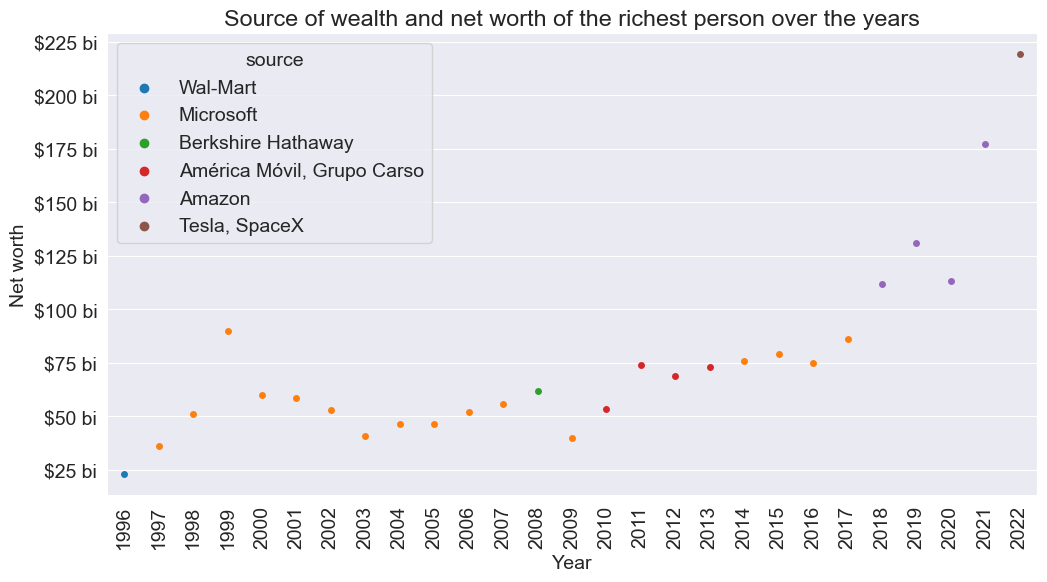

In [45]:
fig, ax = plt.subplots(figsize=(12,6))
sns.stripplot(data=top_source, x='year', y='net_worth', hue='source', ax=ax)
 
ax.yaxis.set_major_formatter(formatter)

ax.set(title='Source of wealth and net worth of the richest person over the years',
      xlabel='Year', ylabel='Net worth')

plt.xticks(rotation=90);

#### Q3: Who were the billionaires that stayed on top for most time?

Here we simply group the names that rank in the 1st position and count how many times they appear. This time I plotted using pandas which turns out to be very practical and fast to implement for simple plots.

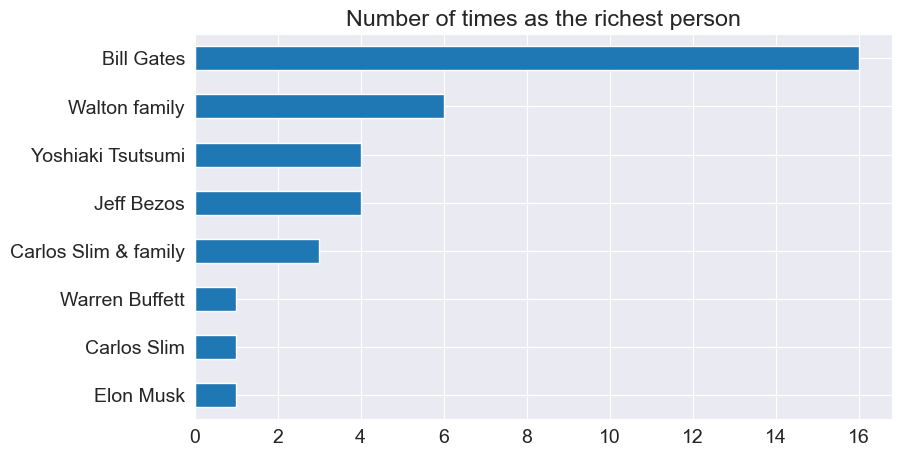

In [46]:
billion.query("ranking == 1").name.value_counts() \
                             .sort_values() \
                             .plot(kind='barh', title='Number of times as the richest person');

#### Q4: How the mean age of the billionaires evolved over time?

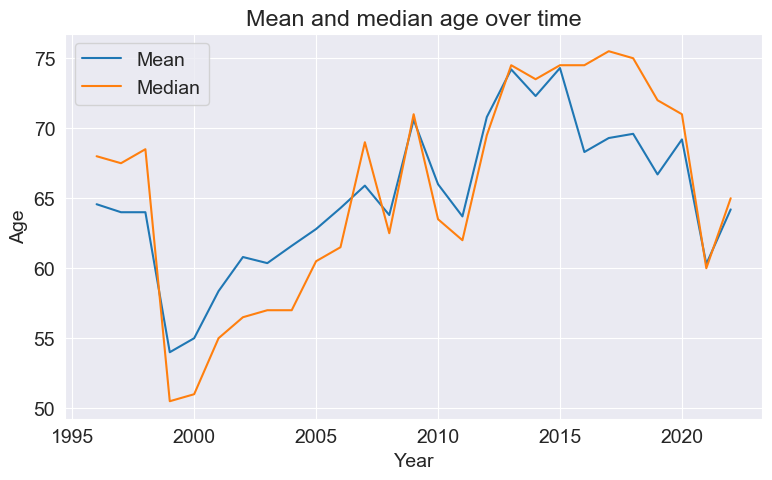

In [47]:
ax = billion.groupby('year').agg({'age': ['mean', 'median']}).dropna().plot()
ax.legend(labels=['Mean', 'Median'])
ax.set(title='Mean and median age over time', xlabel='Year', ylabel='Age');


From the above plot we can see that there is a significant descrepancy between mean and median in some years (like between 2015 and 2020). In this case the median is a better metric to inspect the "average" age of billionaires over the years.

#### Q5: How did the total wealth of the top 10 billionaires evolved over time?

In this plot, besides of formating the y ticks, I also filled the area below the line. That was easily done with the matplotlib function fill_between, and it makes the plot more visually appealing.

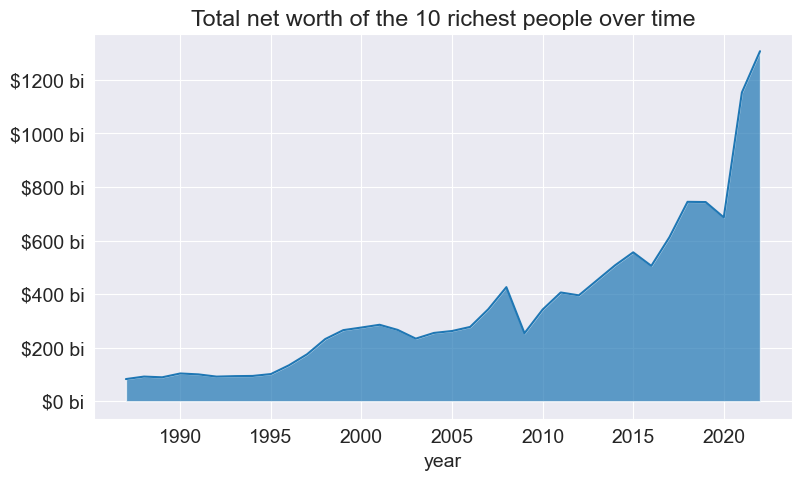

In [48]:
total_nw = billion.groupby('year')['net_worth'].sum()
ax = total_nw.plot()  
ax.yaxis.set_major_formatter(formatter)
ax.fill_between(x=total_nw.index, y1=total_nw, alpha=0.7)
ax.set_title('Total net worth of the 10 richest people over time');

## Inferences and Conclusion

Here is a summary of the most interesting insights extracted from the above analysis:

* Bill gates is the one who appeared most frequently in the 1st position (16 years, 11 of which were consecutive);
* The mean net worth of the 10 richest people on earth from 1987 to 2022 was around 35.76 billion dollars;
* The largest net worth reached in this time period was 219 billion dollars (*Elon Musk - Tesla, Space X*).;
* The mean age of the top 10 richest people on earth from 1987 to 2022 was around 65 years;
* The oldest billionaire in the list was 94 years old (*Forrest Mars Sr. & family - Mars*), while the youngest was 31 years old (*Mark Zuckerberg - Facebook*);
* Up until the early 90's Japan had most of the top richest people on earth;
>That is probably due to the so called "asset price bubble" that took from 1986 to 1991. For more info [click here](https://en.wikipedia.org/wiki/Japanese_asset_price_bubble).
* From 1992 up until nowadays the ranking was, in the majority of the years, almost completely composed by North Americans, with the exception being 2008 with the subprime crisis;
* After the .com bubble the americans took over the top 10 ranking, that is probably because of the rise of the big tech companies;
* The current mean age (as of 2022) of the billionaires is around the historic age of 65 years;
* The total net worth of the 10 richest people on earth seems to be growing at an exponential rate.

## References and Future Work

Here I list some ideas for further work:

* Calculate/estimate the rate of increase of the total net worth, and/or the net worth for each name over the years.
* Investigate more deeply the relationship between the columns in order to find some other insights;
* Incorporate data about the segment (e.g.: Tech, Industry, Finance, Retail, etc.) and query the data around that;
* Redo the total net worth growth analysis, but considering the inflation in the period.

In [2]:
import jovian
project_name = 'the-world-s-billionaires-from-1987-to-2022'
jovian.commit(project=project_name, filename='the-world-s-billionaires-from-1987-to-2022.ipynb')

<IPython.core.display.Javascript object>

[jovian] Creating a new project "ricardoblank/the-world-s-billionaires-from-1987-to-2022"
[jovian] Committed successfully! https://jovian.com/ricardoblank/the-world-s-billionaires-from-1987-to-2022


'https://jovian.com/ricardoblank/the-world-s-billionaires-from-1987-to-2022'